In [1]:
from constants import servers
import analysis_functions

import pandas as pd
import maxminddb

import logging


logging.basicConfig(level=logging.INFO)

def ip_to_asn(ip_address, db_path='data/external/GeoLite2-ASN.mmdb'):
    try:
        with maxminddb.open_database(db_path) as reader:
            result = reader.get(ip_address)
            return result['autonomous_system_organization']
    except Exception as e:
        return None
    
anomaly_dict = {}

capture_id = "non" # identifier (previously only used for abn list or not)

In [ ]:

# Basic Summary Stats + Syntactic Violations: Support Flags Omission and Last Seen Transmission
support_flags_sources, lastseen_sources, basic_stats = analysis_functions.stats_syntactic(capture_id)
anomaly_dict['SF Omission'] = {}
anomaly_dict['SF Omission']['ips'] = list(support_flags_sources)
anomaly_dict['SF Omission']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['SF Omission']['ips']})
anomaly_dict['LS Transmission'] = {}
anomaly_dict['LS Transmission']['ips'] = list(lastseen_sources)
anomaly_dict['LS Transmission']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['LS Transmission']['ips']})



INFO:root:All fields for sfo: Index(['ip', 'port', 'type', 'id', 'source_ip', 'timestamp', 'pl_identifier',
       'pruning_seed', 'rpc_port', 'rpc_credits_per_hash', 'last_seen',
       'cumulative_difficulty', 'cumulative_difficulty_top64',
       'current_height', 'top_id', 'top_version'],
      dtype='object'); Index(['frame_number', 'source_ip', 'source_port', 'dst_ip', 'dst_port',
       'timestamp', 'command', 'monero_flags', 'tcp_segments', 'tcp_length',
       'cumulative_difficulty', 'cumulative_difficulty_top64',
       'current_height', 'top_id', 'top_version', 'pruning_seed',
       'peerlist_length', 'local_time', 'my_port', 'network_id', 'peer_id',
       'support_flags', 'rpc_port', 'rpc_credits_per_hash', 'status',
       'block_ids', '_', 'block', 'current_blockchain_height', 'prune'],
      dtype='object')
INFO:root:All fields for ams: Index(['ip', 'port', 'type', 'id', 'source_ip', 'timestamp', 'pl_identifier',
       'pruning_seed', 'rpc_port', 'rpc_credits_per_has

Using LaTeX formatting


INFO:root:PL Diversity - Unique IPs: 554
INFO:root:PL Diversity - Max announced subnets: 6
INFO:root:PL Diversity - Median announced subnets: 6.0


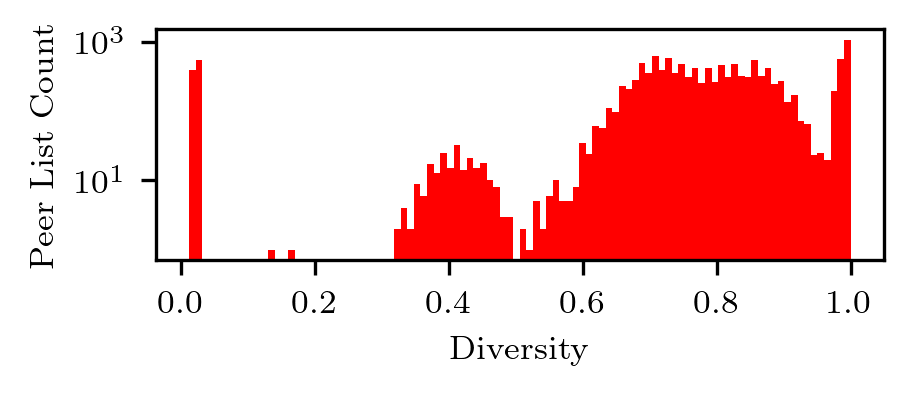

In [ ]:
# Peer List Diversity
pl_div_ips, max_announced_subnets, median_announced_subnets = analysis_functions.peer_list_diversity(capture_id, threshold=0.1)
anomaly_dict['PL Diversity'] = {}
anomaly_dict['PL Diversity']['ips'] = list(pl_div_ips)
anomaly_dict['PL Diversity']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['PL Diversity']['ips']})


Using LaTeX formatting


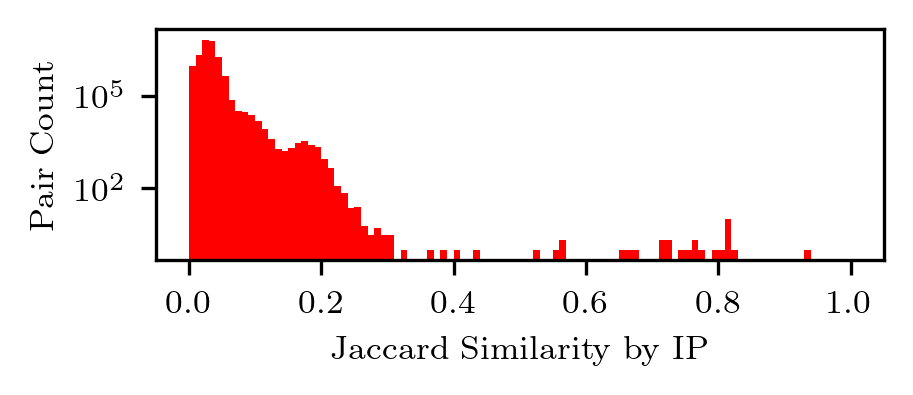

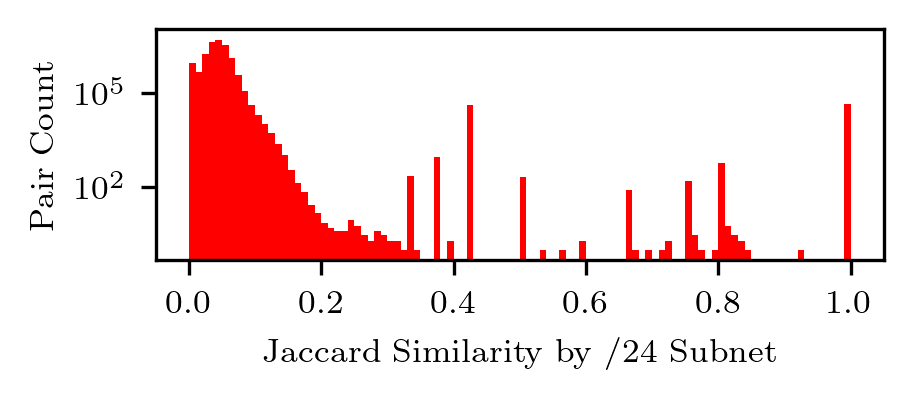

INFO:root:PL Similarity - Unique IPs: 562


In [ ]:
# Peer List Similarity
pl_sim_ips, overlap_df = analysis_functions.peer_list_similarity(capture_id, threshold=0.3)
anomaly_dict['PL Similarity'] = {}
anomaly_dict['PL Similarity']['ips'] = list(pl_sim_ips)
anomaly_dict['PL Similarity']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['PL Similarity']['ips']})


In [ ]:
# ID:IP Anomalies
sus_id_cluster_ips, sus_id_anomaly_ips, interection_ips, union_ips, id_count_dist, num_clusters = analysis_functions.node_ids(capture_id)
anomaly_dict['ID:IP Anomaly'] = {}
#anomaly_dict['ID:IP Anomaly']['ips'] = list(sus_id_anomaly_ips)
#anomaly_dict['ID:IP Anomaly']['ips'] = list(sus_id_cluster_ips)
anomaly_dict['ID:IP Anomaly']['ips'] = list(union_ips)
anomaly_dict['ID:IP Anomaly']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['ID:IP Anomaly']['ips']})


INFO:root:Found 5 ID:IP clusters
INFO:root:ID:IP - Cluster 1: 669 IDs map to 150 IPs
INFO:root:ID:IP - Cluster 2: 6 IDs map to 2 IPs
INFO:root:ID:IP - Cluster 3: 14 IDs map to 2 IPs
INFO:root:ID:IP - Cluster 4: 3 IDs map to 2 IPs
INFO:root:ID:IP - Cluster 5: 610 IDs map to 109 IPs


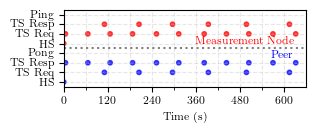

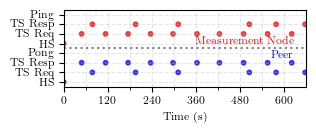

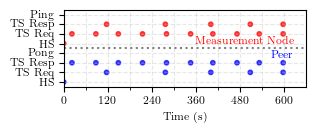

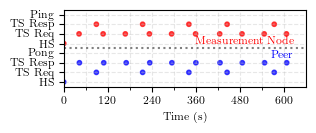

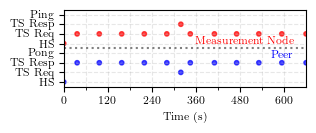

In [ ]:
# Connection Anomalies
sus_short, sus_ping, sus_ts, all_latencies, conn_df = analysis_functions.connections(capture_id, threshold=90, min_tss=600, time_duration=660) 
anomaly_dict['Short-lived Conn'] = {}
anomaly_dict['Ping Flooding'] = {}
anomaly_dict['Throttled TS'] = {}
anomaly_dict['Short-lived Conn']['ips'] = list(sus_short)
anomaly_dict['Short-lived Conn']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['Short-lived Conn']['ips']})
anomaly_dict['Ping Flooding']['ips'] = list(sus_ping)
anomaly_dict['Ping Flooding']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['Ping Flooding']['ips']})
anomaly_dict['Throttled TS']['ips'] = list(sus_ts)
anomaly_dict['Throttled TS']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['Throttled TS']['ips']})


In [ ]:
anomaly_dict['Throttled TS']

In [ ]:
# Signature-only IPs (and ban listed)
banned_ips, signature_only_ips = analysis_functions.ban_and_signature(capture_id)
anomaly_dict['Signature Only'] = {}
anomaly_dict['Signature Only']['ips'] = list(signature_only_ips)
anomaly_dict['Signature Only']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['Signature Only']['ips']})
anomaly_dict['Ban Listed'] = {}
anomaly_dict['Ban Listed']['ips'] = list(banned_ips)
anomaly_dict['Ban Listed']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['Ban Listed']['ips']})


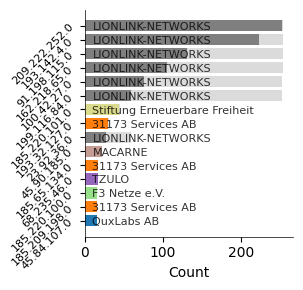

In [ ]:
# Subnet and ASN Saturation
sus_subnet_ips, lion_peers, median_subnet_peers = analysis_functions.subnets_asn_comb(capture_id)
anomaly_dict['High Subnet Sat'] = {}
anomaly_dict['High Subnet Sat']['ips'] = list(sus_subnet_ips)
anomaly_dict['High Subnet Sat']['asns'] = list({ip_to_asn(ip) for ip in anomaly_dict['High Subnet Sat']['ips']})
# In-Degree analysis
indegrees = pd.DataFrame(analysis_functions.indegree(capture_id))

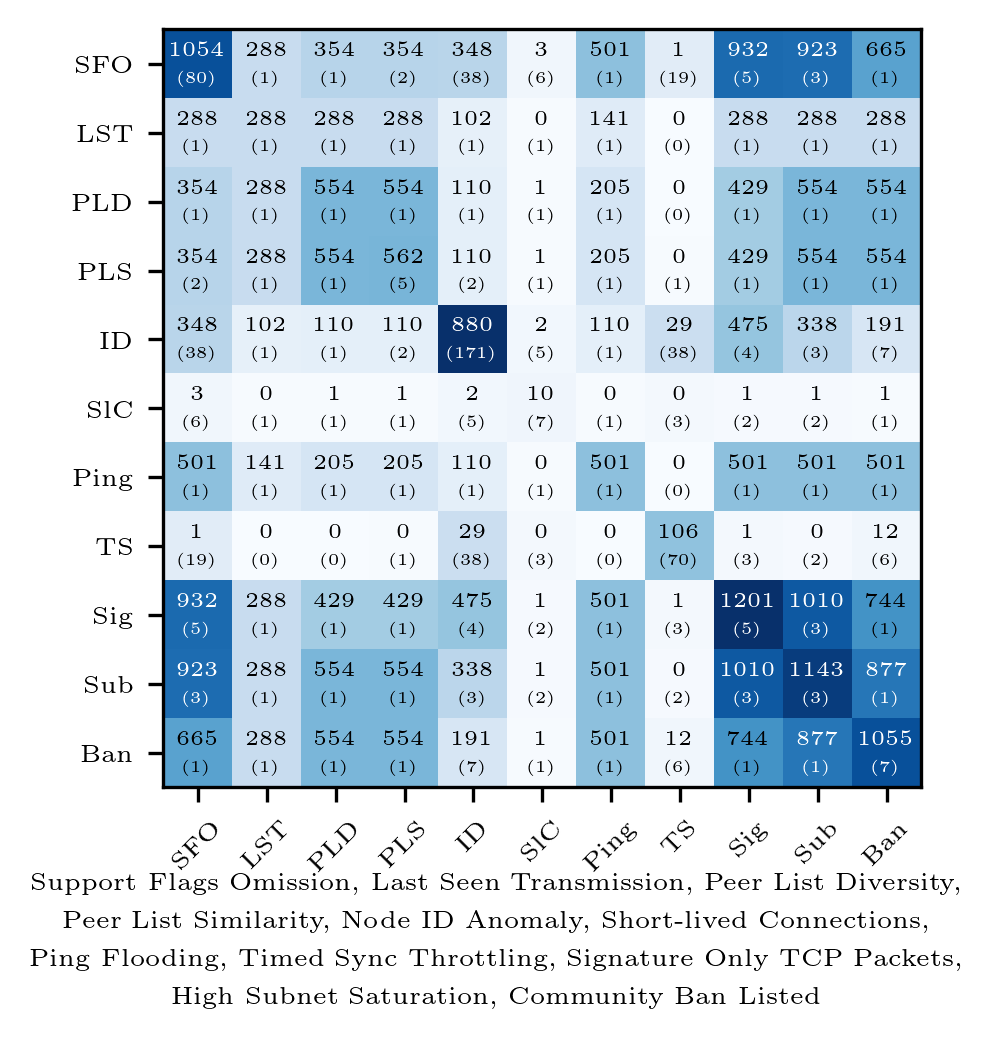

INFO:root:Identified 1939 non-standard peers.


In [ ]:
# Final Eval
identified_ns_peers = analysis_functions.summarize_IPs_plot_overlap(capture_id, anomaly_dict)

In [ ]:

all_ns_peers = analysis_functions.save_ns_peers(identified_ns_peers)

INFO:root:Identified before: 2708 non-standard peers.
INFO:root:Identified in all runs: 2708 non-standard peers.


/home/ykpyck/Repos/monero-traffic-analysis/anomaly_functions.py:1181: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aligned = series.reindex(all_times).fillna(method='ffill').fillna(0)
/home/ykpyck/Repos/monero-traffic-analysis/anomaly_functions.py:1181: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aligned = series.reindex(all_times).fillna(method='ffill').fillna(0)
INFO:root:Averaged absolute active anomalous connections: 29.290
INFO:root:  anomalous: 0.207
INFO:root:  non-anomalous: 0.793
INFO:root:Averaged absolute active anomalous connections: 1.653
INFO:root:  anomalous: 0.154
INFO:root:  non-anomalous: 0.846


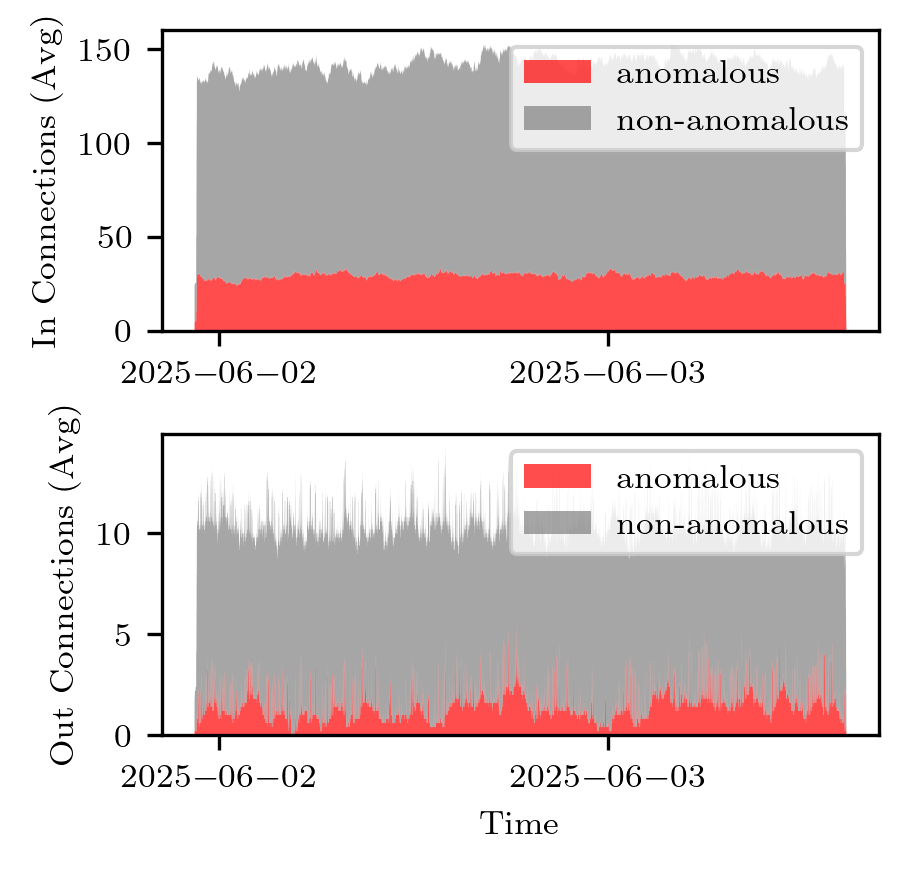

In [ ]:
saturation_stats = analysis_functions.plot_anom_saturation(capture_id, total_anomaly_set=identified_ns_peers)
reachable_peers = analysis_functions.reachable(capture_id, identified_ns_peers)

In [ ]:
ban_list_stats = analysis_functions.compare_to_banlist(all_ns_peers)

INFO:root:My ban list: 2708 - community ban list: 1941
INFO:root:    common IPs: 1657
INFO:root:    2992
INFO:root:    uniquely identified: 1051


In [ ]:
pl_poison = analysis_functions.pl_poison_dist(capture_id, identified_ns_peers)
network_distribution = analysis_functions.network_distribution(capture_id, identified_ns_peers)
analysis_functions.format_and_write_tex(capture_id, basic_stats, anomaly_dict, conn_df, all_latencies, indegrees, 
                     sus_id_anomaly_ips, sus_id_cluster_ips, num_clusters, median_subnet_peers, 
                     identified_ns_peers, reachable_peers, lion_peers, saturation_stats, 
                     ban_list_stats, pl_poison, len(all_ns_peers))